In [40]:
import numpy as np
import os
import cv2
import math
from matplotlib import pyplot as plt
from skimage.transform import hough_line, hough_line_peaks


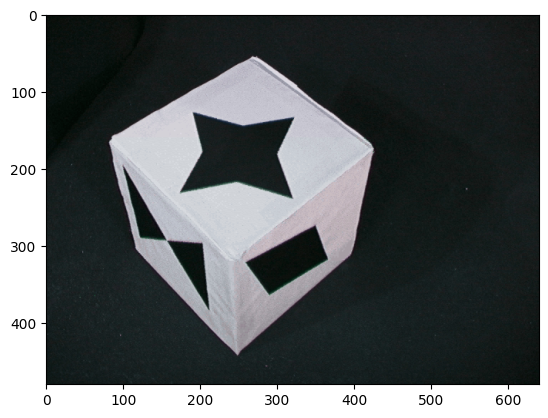

In [41]:
#part 7.1
im = cv2.imread("week06_data/Box3.bmp")
plt.imshow(im)
plt.show()


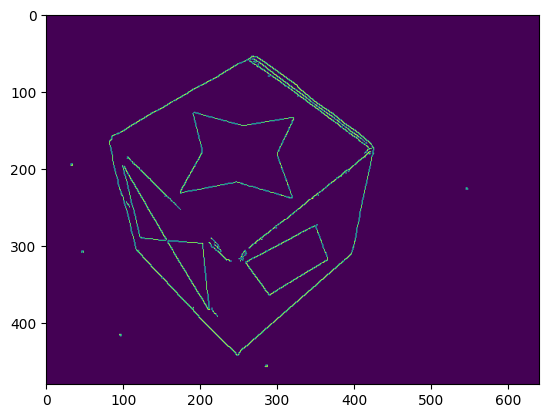

In [42]:
edges = cv2.Canny(im, threshold1=70, threshold2=200) 
plt.imshow(edges)
plt.show()

In [43]:
#part 7.2
hspace, angles, dists = hough_line(edges)
print("Dimensions of Hough space:", hspace.shape)

'''
1) hough Space (hspace):
hspace is an accumulator array that represents the Hough space.
Each cell in the hspace array corresponds to a possible line in the image space.
The value in each cell indicates the number of edge points that are consistent with a particular line in the image space.
Higher values in the accumulator array indicate stronger evidence for the presence of a line at the corresponding angle and distance.
2) Angles (angles):
angles is an array that contains the angles (in radians) corresponding to the detected lines.
Each angle represents the orientation of a detected line in the image space.
3) Distances (dists):
dists is an array that contains the distances from the origin to the detected lines.
Each distance value represents the perpendicular distance from the origin to a detected line in the image space.
'''

Dimensions of Hough space: (1601, 180)


'\n1) hough Space (hspace):\nhspace is an accumulator array that represents the Hough space.\nEach cell in the hspace array corresponds to a possible line in the image space.\nThe value in each cell indicates the number of edge points that are consistent with a particular line in the image space.\nHigher values in the accumulator array indicate stronger evidence for the presence of a line at the corresponding angle and distance.\n2) Angles (angles):\nangles is an array that contains the angles (in radians) corresponding to the detected lines.\nEach angle represents the orientation of a detected line in the image space.\n3) Distances (dists):\ndists is an array that contains the distances from the origin to the detected lines.\nEach distance value represents the perpendicular distance from the origin to a detected line in the image space.\n'

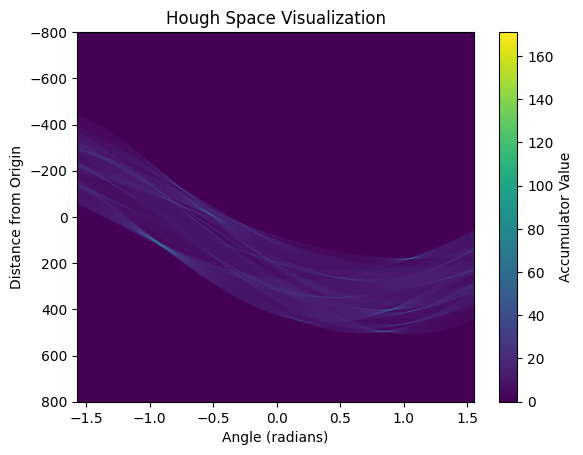

In [44]:
#part 7.3
def visualize_hough_space(hspace, angles, dists):
    extent = [angles[0], angles[-1], dists[-1], dists[0]]
    plt.imshow(hspace, extent=extent, aspect='auto')
    plt.xlabel('Angle (radians)')
    plt.ylabel('Distance from Origin')
    plt.title('Hough Space Visualization')
    plt.colorbar(label='Accumulator Value')
    plt.show()


visualize_hough_space(hspace, angles, dists)

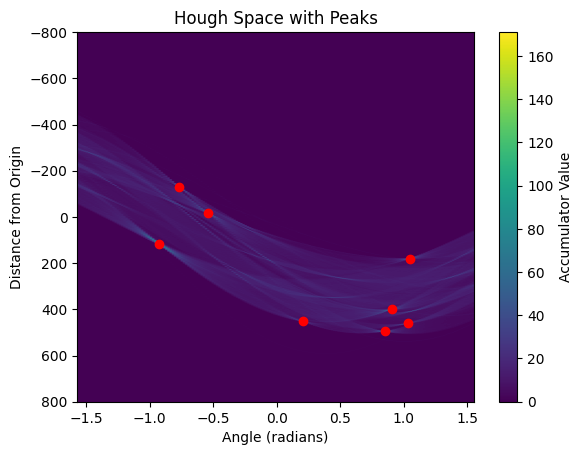

In [45]:
#part 7.4
def find_and_visualize_peaks(hspace, angles, dists, num_peaks=10):
    # Find peaks in Hough space
    hough_peaks, extAngles, extDists = hough_line_peaks(hspace, angles, dists, num_peaks=num_peaks)

    # Visualize Hough space with peaks
    plt.imshow(hspace, extent=[angles[0], angles[-1], dists[-1], dists[0]], aspect='auto')
    plt.xlabel('Angle (radians)')
    plt.ylabel('Distance from Origin')
    plt.title('Hough Space with Peaks')
    plt.colorbar(label='Accumulator Value')
    
    # Plot peaks on top of Hough space
    for angle, dist in zip(extAngles, extDists):
        plt.plot(angle, dist, 'ro')  # Plot peaks as red circles
    
    plt.show()


find_and_visualize_peaks(hspace, angles, dists, num_peaks=10)

Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is completely outside image
Line is co

/var/folders/02/ft7cs0yd1n361rhk5nqxspmc0000gn/T/ipykernel_42823/2221998996.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  m = -np.cos(theta) / np.sin(theta)
/var/folders/02/ft7cs0yd1n361rhk5nqxspmc0000gn/T/ipykernel_42823/2221998996.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  b = dist / np.sin(theta)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/numeric.py:1648: RuntimeWarning: invalid value encountered in multiply
  tmp = array(a2 * b1)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/numeric.py:1651: RuntimeWarning: invalid value encountered in multiply
  multiply(a0, b2, out=tmp)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/numeric.py:1653: RuntimeWarning: invalid value encountered in multiply
  multiply(a0, b1, out=cp2)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/numeric.py:1650: RuntimeWarning: invalid value encountered in multiply
  multiply(a2, b0, out=cp1)
/var/folders/02/ft7cs0yd1n361rhk5nqxspmc000

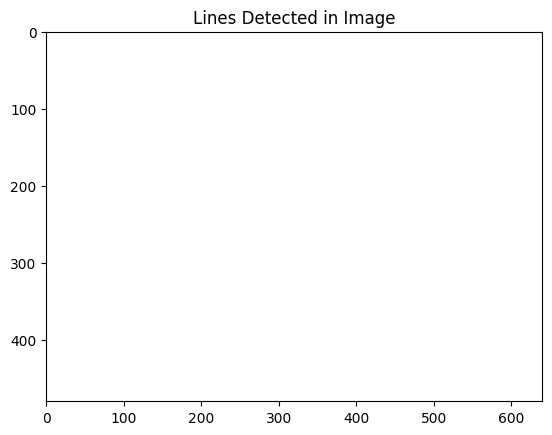

In [46]:
def DrawLine(l, shape):
    #Checks where the line intersects the four sides of the image
    # and finds the two intersections that are within the frame
    def in_frame(l_im):
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
            return q
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    if (len(P)==0):
        print("Line is completely outside image")
    plt.plot(*np.array(P).T)


for angle, dist in zip(angles, dists):
        # Convert polar coordinates (angle, distance) to Hough space to Cartesian equation (y = mx + b)
        theta = angle * np.pi / 180
        m = -np.cos(theta) / np.sin(theta)
        b = dist / np.sin(theta)
        
        # Draw the line on top of the image
        line = np.array([m,-1,b])
        DrawLine(line, im.shape)

plt.xlim(0, im.shape[1])  # Set x-axis limits
plt.ylim(im.shape[0], 0)  # Set y-axis limits (flip vertically)
plt.title('Lines Detected in Image')
plt.show()


In [47]:
#RANSAC

def test_points(n_in, n_out):
    a = (np.random.rand(n_in)-.5)*10
    b = np.vstack((a, a*.5+np.random.randn(n_in)*.25))
    points = np.hstack((b, 2*np.random.randn(2, n_out)))
    return np.random.permutation(points.T).T



In [48]:
#part 7.7

def fit_line_through_points(point1, point2):
    # Step 1: Calculate the line equation in Cartesian coordinates (slope-intercept form)
    x1, y1 = point1
    x2, y2 = point2

    # Calculate slope (m) and intercept (b)
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    # Step 2: Convert the Cartesian line equation to homogeneous coordinates
    # A line in Cartesian coordinates: y = mx + b
    # Convert to homogeneous coordinates: a*x + b*y + c = 0
    a = -m
    b = 1
    c = -b

    # Return the line coefficients in homogeneous coordinates
    return np.array([a, b, c])


point1 = (1, 2)
point2 = (4, 5)
line = fit_line_through_points(point1, point2)
print("Line in homogeneous coordinates:", line)

Line in homogeneous coordinates: [-1.  1. -1.]


In [49]:
#part 7.8

def distance_point_to_line(point, line):
    # Calculate the distance between a point (x, y) and a line ax + by + c = 0
    x, y = point
    a, b, c = line
    return np.abs(a*x + b*y + c) / np.sqrt(a**2 + b**2)

def classify_points_with_threshold(points, line, threshold):
    inliers = []
    outliers = []
    
    # Iterate over each point and classify it as an inlier or an outlier
    for point in points:
        distance = distance_point_to_line(point, line)
        if distance <= threshold:
            inliers.append(point)
        else:
            outliers.append(point)
    
    return inliers, outliers


points = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

# Define a line in homogeneous coordinates (a*x + b*y + c = 0)
line = (1, -1, 0)  #line: x - y = 0
threshold = 1.0 

# Classify points as inliers or outliers with respect to the line
inliers, outliers = classify_points_with_threshold(points, line, threshold)

print("Inliers:", inliers)
print("Outliers:", outliers)

Inliers: [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]
Outliers: []


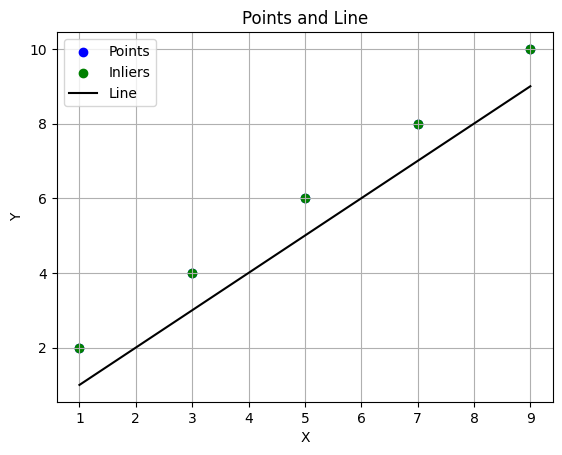

In [50]:
# Plot the points
x_points, y_points = zip(*points)
x_inliers, y_inliers = zip(*inliers)
if outliers:
    x_outliers, y_outliers = zip(*outliers)
    plt.scatter(x_outliers, y_outliers, color='red', label='Outliers')

# Plot the points
plt.scatter(x_points, y_points, color='blue', label='Points')
plt.scatter(x_inliers, y_inliers, color='green', label='Inliers')

# Plot the line
x_values = np.linspace(min(points)[0], max(points)[0], 100)
if outliers:  # Check if outliers list is not empty
    x_values = np.linspace(min(min(points)[0], min(outliers)[0]), max(max(points)[0], max(outliers)[0]), 100)
y_values = (-line[0] * x_values - line[2]) / line[1]
plt.plot(x_values, y_values, color='black', linestyle='-', label='Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points and Line')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
#part 7.8
def calculate_consensus(points, line, threshold):
    inliers_count = 0
    
    # Iterate over each point and count the number of inliers
    for point in points:
        distance = distance_point_to_line(point, line)
        if distance <= threshold:
            inliers_count += 1
    
    return inliers_count


points = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

# Define a line in homogeneous coordinates (a*x + b*y + c = 0)
line = (1, -1, 0)  # Example line: x - y = 0

# Set the threshold distance
threshold = 1.0  # Example threshold

# Calculate the consensus (number of inliers) for the line with respect to the points
consensus = calculate_consensus(points, line, threshold)
print("Consensus (number of inliers):", consensus)


Consensus (number of inliers): 5


In [52]:
#part 7.9
def sample_two_points(points):
    points_array = np.array(points)
    # Randomly sample two points from the list of points without replacement
    sampled_indices = np.random.choice(len(points_array), size=2, replace=False)
    sampled_points = points_array[sampled_indices]
    return sampled_points[0], sampled_points[1]


point1, point2 = sample_two_points(points)
print("Sampled points:", point1, point2)

Sampled points: [1 2] [ 9 10]


In [53]:
#part 7.10
def fit_line_through_points(point1, point2):
    # Step 1: Calculate the line equation in Cartesian coordinates (slope-intercept form)
    x1, y1 = point1
    x2, y2 = point2

    # Calculate slope (m) and intercept (b)
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    # Step 2: Convert the Cartesian line equation to homogeneous coordinates
    # A line in Cartesian coordinates: y = mx + b
    # Convert to homogeneous coordinates: a*x + b*y + c = 0
    a = -m
    b = 1
    c = -b

    # Return the line coefficients in homogeneous coordinates
    return np.array([a, b, c])

def ransac(points, iterations, threshold):
    best_line = None
    best_inliers_count = 0
    
    for _ in range(iterations):
        # Step 1: Randomly sample two points
        point1, point2 = sample_two_points(points)
        
        # Step 2: Fit a line through the sampled points
        line = fit_line_through_points(point1, point2)
        
        # Step 3: Calculate consensus (number of inliers) for the line
        inliers_count = calculate_consensus(points, line, threshold)
        
        # Step 4: Update the best line if necessary
        if inliers_count > best_inliers_count:
            best_inliers_count = inliers_count
            best_line = line
            
    return best_line, best_inliers_count


In [54]:
points = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14)]

# Set parameters
iterations = 1000
threshold = 1.0

# Run RANSAC algorithm
best_line, best_inliers_count = ransac(points, iterations, threshold)

print("Best line:", best_line)
print("Number of inliers:", best_inliers_count)

Best line: [-1.  1. -1.]
Number of inliers: 7


In [56]:
#part 7.12
def pca_line(x): # assumes x is a (2 x n) array of points
    d = np.cov(x)[:, 0]
    d /= np.linalg.norm(d)
    l = [d[1], -d[0]]
    l.append(-(l@x.mean(1)))
    return l

In [58]:
def ransac(points, iterations, threshold):
    best_inliers_count = 0
    best_inliers = []
    
    for _ in range(iterations):
        # Step 1: Randomly sample two points
        point1, point2 = sample_two_points(points)
        
        # Step 2: Fit a line through the sampled points
        line = fit_line_through_points(point1, point2)
        
        # Step 3: Calculate consensus (number of inliers) for the line
        inliers, inliers_count = calculate_consensus(points, line, threshold)
        
        # Step 4: Update the best line if necessary
        if inliers_count > best_inliers_count:
            best_inliers_count = inliers_count
            best_inliers = inliers
            
    # Step 5: Fit a new line to all inliers of the best line
    if best_inliers:
        inlier_points = np.array(best_inliers).T
        new_line = pca_line(inlier_points)
        return new_line, len(best_inliers)
    else:
        return None, 0


In [ ]:
'''Exercise 7.13
Implement the stopping criteria for RANSAC as described on the slides. Use p = 0.99.'''